## Raman Spectroscopy Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import interpolate

### Reading the data

In [2]:
# X-axis Raman Shift, Y-axis Intensity
raman_data=pd.read_csv("/Users/krishnakamaladidam/Downloads/raman.txt",sep="\t", header=None)


#### Plotting the raw data

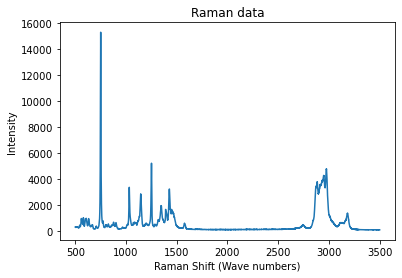

In [3]:
plt.plot(raman_data[0],raman_data[1])
plt.title("Raman data")
plt.xlabel("Raman Shift (Wave numbers)")
plt.ylabel("Intensity")
plt.show()


#### Finding where the peaks are in raw data using find_peaks

In [4]:
from scipy import signal
peaks,_=scipy.signal.find_peaks(raman_data[1],prominence=1000)
raman_raw_peaks=[]
for i in peaks:
       raman_raw_peaks.append(raman_data[1][i])
raman_raw_peaks.sort(reverse=True)
raman_raw_peaks_8=raman_raw_peaks[0:8] 
#Getting the highest eight values in raw data
print("The eight peaks in the raw spectral data by the order of intensities is:")
print(raman_raw_peaks_8)

The eight peaks in the raw spectral data by the order of intensities is:
[15275.059, 5203.3115, 4767.228, 3351.595, 3219.4121, 2840.8713, 1943.8367, 1359.3477]


#### Getting the peaks' X-axis coordinates(Wave numbers)

In [5]:
raman_data_eight_indices=[]
for i in range(len(raman_data[1])):
    if (raman_data[1][i] in raman_raw_peaks_8):
        raman_data_eight_indices.append(raman_data[0][i])
print("Eight wavenumbers for intensities in raw Raman data is: ")
print(raman_data_eight_indices)

Eight wavenumbers for intensities in raw Raman data is: 
[750.42657, 1031.9596, 1145.3602, 1250.886, 1346.5677, 1427.287, 2975.9155, 3184.2104]



#### A function which returns the Wave numbers and intensities for a given width (region of interest)

In [6]:
def intensities_for_indices(width,value):    
    peak_indices=[]
    peak_values=[]
    for i in range(len(raman_data[0])):
        if ((value-width)<(raman_data[0][i])<(value+width)):
            peak_indices.append(raman_data[0][i])
            peak_values.append(raman_data[1][i])
    return peak_indices, peak_values

#### A function which returns the zero crossing coordinates after interpolation

In [7]:

def interpolate_fn(a,b):
    plt.plot(a,b,linestyle=':')                         # Plotting the original data in region of interest
    interpolate_tuple = interpolate.splrep(a, b)        # interpolating
    spline=interpolate.splev(a,interpolate_tuple,der=0)
    f=interpolate.UnivariateSpline(a,b,k=4)             
    plt.plot(a,f(a),'b.')                               # Plotting the interpolated data in region of interest
    plt.plot(f.derivative().roots()[np.argmax(f(f.derivative().roots()))],max(f(f.derivative().roots())),'or')
    plt.title("Plot showing interpolated data overlayed on raw spectral data in region of interest")
    plt.xlabel("Raman Shift in region of interest")
    plt.ylabel("Intensity in region of interest")
    plt.show()
    y_derivative = interpolate.splev(a, interpolate_tuple, der=1)  # Finding the derivative in region of interest
    plt.plot(a, y_derivative)                                      # Plotting the wavenumber and derivative in region
    plt.plot(a, y_derivative*0) 
    plt.title("Plot showing Derivative versus wavenumber in region of interest with zero crossing shown")
    plt.xlabel("Raman Shift")
    plt.ylabel("Derivative of Intensity in region of interest")
    plt.show()
    print("Zero crossings is: {0}".format(f.derivative().roots()))  # Finding the zero crossing of derivative
    print("Intensity at zero crossings is {0}".format(f(f.derivative().roots()))) # Corresponding intensity
    return f.derivative().roots()[np.argmax(f(f.derivative().roots()))],max(f(f.derivative().roots()))


#### Iterating over all the eight peaks found in raw data 


For peak 1


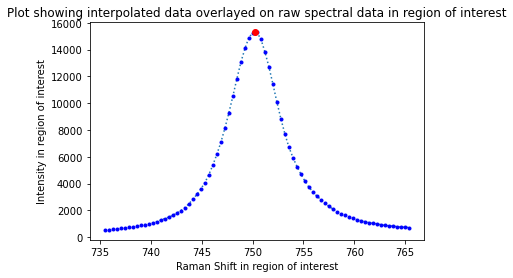

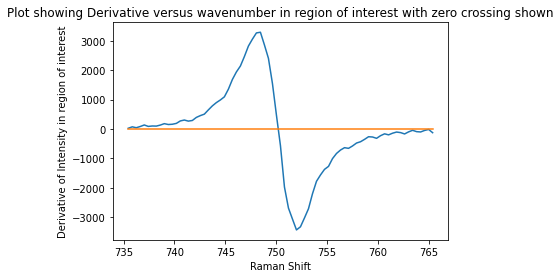

Zero crossings is: [750.26455195]
Intensity at zero crossings is [15292.20395502]

For peak 2


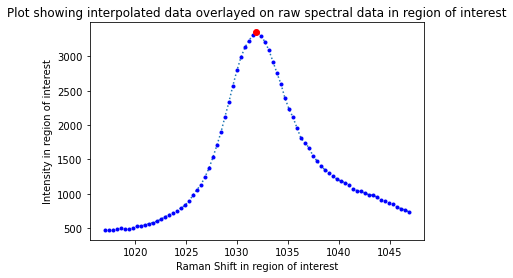

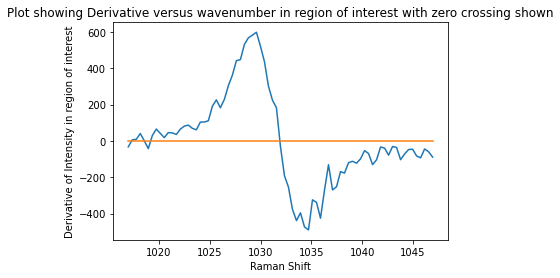

Zero crossings is: [1017.16226552 1017.61206577 1017.92633188 1018.52346351 1019.22677323
 1031.8896153  1046.86925189]
Intensity at zero crossings is [ 462.89046347  479.68618773  474.21613082  499.02443567  478.42816278
 3351.49525642  732.05525242]

For peak 3


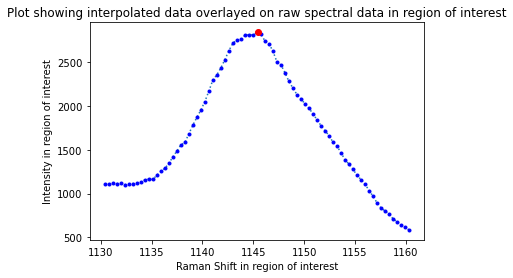

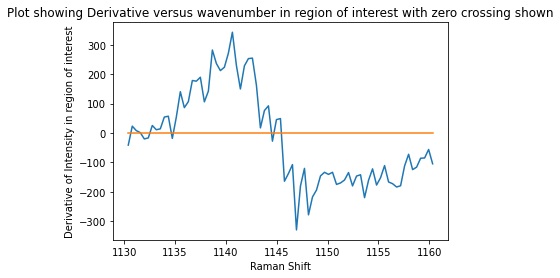

Zero crossings is: [1130.54288238 1130.95875142 1131.37664824 1131.77252869 1132.14178437
 1132.55338777 1132.96945988 1133.34526723 1133.76549934 1134.09305418
 1134.54431243 1134.93652404 1135.45444549 1135.59046866 1136.17936009
 1136.39075263 1137.84997772 1137.98897927 1143.44982105 1143.51678674
 1144.3984942  1144.80015591 1145.43465906 1159.86420449 1160.08879568]
Intensity at zero crossings is [1147.66924167 1092.01561629 1136.71754782 1096.14735378 1132.36953683
 1079.74173138 1136.96784837 1092.9776683  1148.10649071 1117.51766687
 1190.65967622 1136.84896198 1211.19778458 1209.11219856 1293.10333591
 1284.85124641 1555.61921558 1553.71712578 2753.51430021 2753.46529508
 2823.27649852 2804.10248284 2843.09361665  614.16666215  618.35082486]

For peak 4


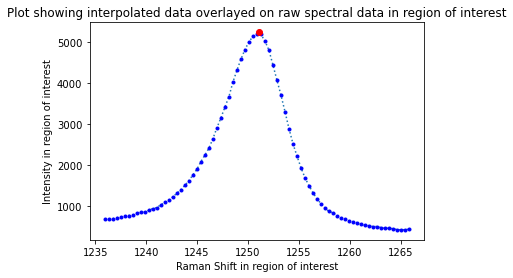

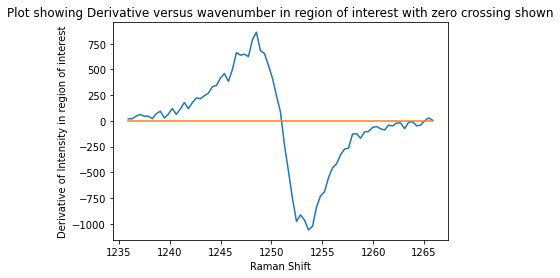

Zero crossings is: [1239.46299512 1239.53708296 1250.45029965 1250.58962501 1251.07488516
 1261.46491162 1261.6434193  1262.30923378 1262.61495319 1263.48183926
 1263.76835129 1265.08358724 1265.80399922]
Intensity at zero crossings is [ 846.26385624  846.170415   5143.37077495 5139.19623578 5242.84105238
  532.8413524   534.61913888  500.22166483  503.24811237  458.49152567
  460.41174026  419.21184197  435.84153389]

For peak 5


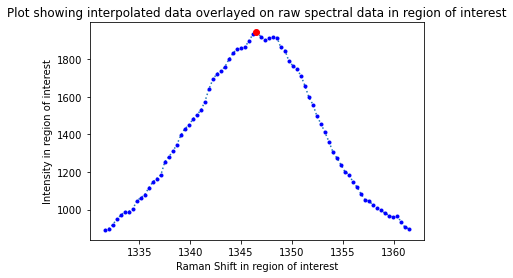

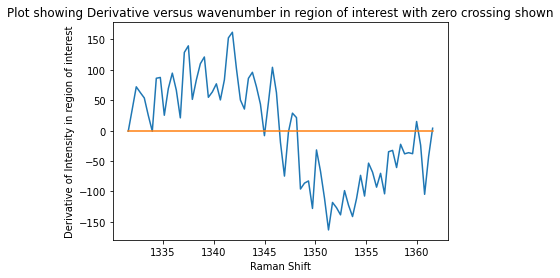

Zero crossings is: [1333.72848984 1333.98787004 1344.89703166 1345.20203992 1346.48757
 1347.37088303 1348.31430982 1359.88999394 1360.29195855]
Intensity at zero crossings is [ 990.36189766  989.0051986  1862.93148535 1860.69128271 1944.53580926
 1902.60812055 1924.03504731  957.91042596  967.73198545]

For peak 6


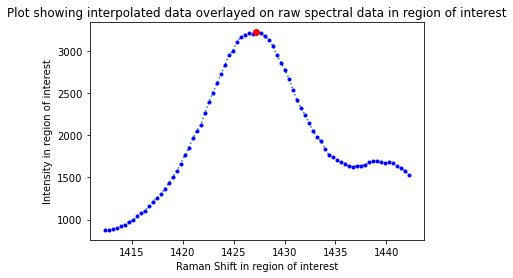

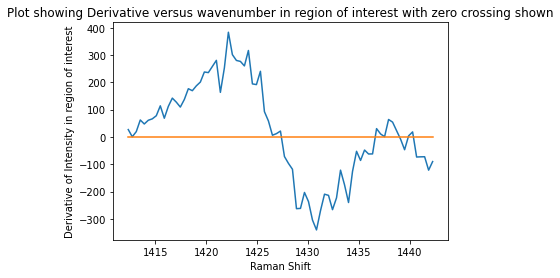

Zero crossings is: [1412.36335366 1425.69660112 1425.78697204 1426.35491532 1426.71870179
 1427.17259858 1436.57258714 1437.18594091 1437.57308564 1439.01278387
 1439.92260414 1440.41198053]
Intensity at zero crossings is [ 877.68712006 3167.58643842 3167.13338837 3217.65663254 3198.99065863
 3223.01029306 1624.06964797 1642.12572346 1637.53011352 1696.97781179
 1671.21064622 1685.69472437]

For peak 7


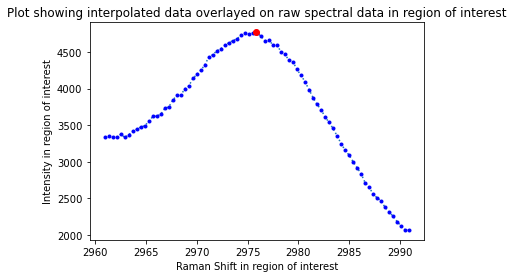

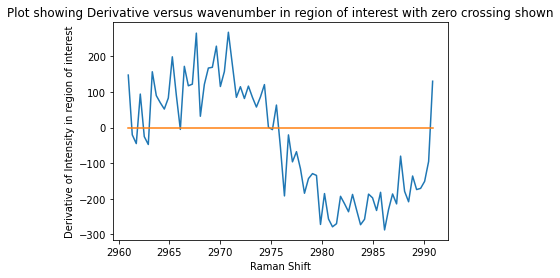

Zero crossings is: [2961.29947171 2961.92873173 2962.49701987 2962.98348623 2965.86726821
 2966.12612132 2968.07307758 2968.29763818 2974.73085025 2975.15038124
 2975.7791675  2976.71804749 2976.99590318 2977.55206323 2977.79215012
 2990.69802094]
Intensity at zero crossings is [3354.16074425 3329.98290355 3375.65038657 3331.55397628 3627.20061285
 3623.78384868 3909.6310176  3903.94093555 4756.31986131 4742.57530413
 4771.51384068 4657.97289482 4669.66129717 4594.90281399 4605.69910642
 2054.23188042]

For peak 8


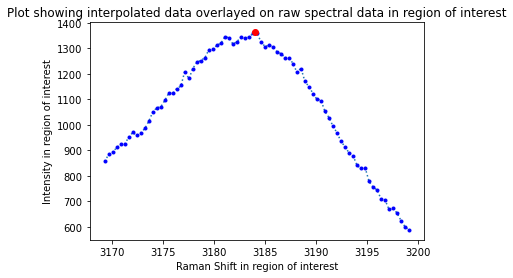

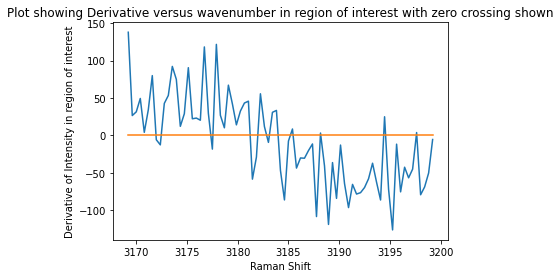

Zero crossings is: [3170.84626467 3171.0511699  3171.97785637 3172.45329298 3175.63029982
 3175.8485694  3177.1533708  3177.54467437 3179.63643975 3179.80179427
 3181.23352271 3181.94011977 3182.69227874 3183.11572608 3184.04643446
 3185.02985462 3185.46024078 3187.09018289 3187.29993151 3188.13729251
 3188.48703913 3190.17665873 3190.32872745 3194.33812405 3194.70944288
 3196.56410018 3196.63676779 3197.30510747 3197.6174114 ]
Intensity at zero crossings is [ 923.1783555   922.35939118  970.1390698   958.00972194 1124.77084791
 1122.92322963 1208.71532702 1182.36713543 1296.59046743 1295.83032626
 1348.91536378 1315.12117736 1343.46677153 1338.20309553 1362.83675048
 1306.75251467 1312.45567829 1262.58503873 1263.55043684 1206.59874003
 1221.85812342 1099.71468327 1100.3912414   827.56030345  837.05242889
  707.83636949  707.95167486  667.07002827  673.58004898]


In [8]:
max_x_list=[]                                    # List to store wavenumbers of peaks after interpolating in region of interest
max_y_list=[]                                    # List to store intensities of peaks after interpolating in region of interest
for i in range(len(raman_data_eight_indices)):
    print("")
    print("For peak {0}".format(i+1))
    x,y=intensities_for_indices(15,raman_data_eight_indices[i])
    max_x,max_y=interpolate_fn(x,y)
    max_x_list.append(max_x)
    max_y_list.append(max_y)

#### Writing the wavenumber estimates for the eight largest spectral peaks sorted by magnitude of intensities to STDOUT

In [9]:
import sys
print('the wavenumber estimates for the eight largest spectral peaks sorted by magnitude of intensities are:')
df_values = pd.DataFrame(list(zip(max_x_list, max_y_list)),columns =['Wavenumber', 'Intensity'])
df_sorted=df_values.sort_values('Intensity',ascending=False)
Wavenumber_list=[]
Wavenumber_list.append(list(df_sorted[:]["Wavenumber"]))
sys.stdout.write(str(Wavenumber_list))

the wavenumber estimates for the eight largest spectral peaks sorted by magnitude of intensities are:
[[750.264551948248, 1251.0748851558621, 2975.7791674975224, 1031.889615303722, 1427.1725985841142, 1145.434659064874, 1346.4875700007892, 3184.0464344578077]]

#### Plotting the Raman data and marking the maximum intensity values

Plot of Raman data with the peaks marked


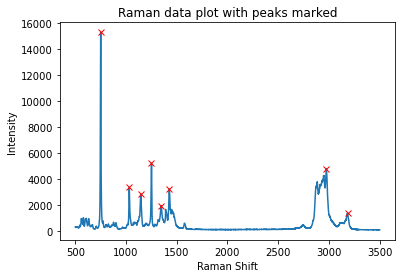

In [10]:
print("Plot of Raman data with the peaks marked")
plt.plot(raman_data[0],raman_data[1])
plt.plot(max_x_list,max_y_list,'xr')
plt.title("Raman data plot with peaks marked")
plt.xlabel("Raman Shift")
plt.ylabel("Intensity")
plt.show()